- 차원이 증가함에 따라 필요한 데이터 양과 시간 복잡도가 증가하는 문제
- 차원을 줄여야 하는 이유 : 모델 학습시간 증가, 과적합으로 인한 성능 저하

### 특징 선택
- 효과적인 특징만 선택해서 차원 축소
- n개의 특징으로 구성된 특징 집합에서 m<<n개의 특징 선택, 새 집합 구성
### 적용 대상
- 특징이 많은 데이터에만 적용X

In [1]:
import pandas as pd
df = pd.read_csv('./데이터/appendicitis.csv')
x = df.drop('Class', axis = 1)
y = df['Class']

In [2]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y)

In [3]:
# 특징에 따른 SVM 모델 테스트 함수 작성
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def feature_test(train_x, test_x, train_y, test_y, features):
    s_train_x = train_x[features]
    s_test_x = test_x[features]
    
    model = SVC().fit(s_train_x, train_y)
    pred_y = model.predict(s_test_x)
    return f1_score(test_y, pred_y)

base_score = feature_test(train_x, test_x, train_y, test_y, train_x.columns) # 모든 특징을 썻을 때의 정수
print(base_score)

0.5333333333333333


In [4]:
import itertools
c_list = list(range(1, len(train_x.columns))) # 1부터 전체
outperform_ratio_list = []
best_score = []

for c in range(1, len(train_x.columns)): # c = 선택한 특징 개수
    print(c)
    c_num = 0 # 특징을 c개 뽑았을때, 원본보다 성능이 좋은 경우
    c_dem = 0 # 특징을 c개 뽑는 경우의 수
    
    for features in itertools.combinations(train_x.columns, c):
        score = feature_test(train_x, test_x, train_y, test_y, list(features))
        # itertools을 tuple 형태로 값 반환 해서 list로 바꿔줌
        if score > best_score:
            best_score = score
            best_feature = list(features)
            
        if score > base_score:
            c_num += 1
        c_dem += 1
        
    outperform_ratio_list.append(c_num / c_dem)

1
2


C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this 

3


C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this 

4


C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this 

5
6


C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if score > best_score:
C:\Users\82106\AppData\Local\Temp/ipykernel_924/308621351.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this 

<BarContainer object of 6 artists>

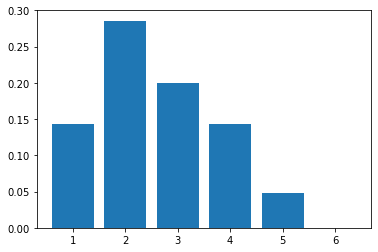

In [5]:
from matplotlib import pyplot as plt
plt.bar(c_list, outperform_ratio_list)

### 주먹구구식 특징 선택
- 선택 가능한 모든 특징 집합을 비교/평가 하여 가장 좋은 특징 집합을 선택
- 현실적으로 적용 불가

### 필터링 기반의 특징 선택
- 클래스 관련성이 높은 특징을 우선 선택
#### 클래스 관련성
- 특징이 클래스를 얼마나 잘 설명하는지 나타내는 척도
- 특징과 라벨 간 독립성을 나타내는 통계량을 사용하여 특정
- 클래스 관련성이 높은 특징은 분류 및 예측에 도움
#### 클래스 관련성 척도 분류
- 카이제곱 통계량 : 특징 - 이진형, 라벨 - 이진형, chi2
- F-통계량 : 특징 - 연속 ,라벨 - 이진, 연속, f_classif, f_regression
#### sklearn.feature_selection.SelectKBest
- scoring_func : 관련성 특정 함수
- k : 선택하는 특징 개수
- .fit.transform, fit_transform : 특징을 선택하는데 사용하는 메서드
- .get_support() : 선택된 특징의 인덱스를 반환
- scoring_func(x,y)의 결과물과 같음

### 모든 특징 유형이 같은 경우

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./데이터/Sonar_Mines_Rocks.csv')
x = df.drop('Y', axis = 1)
y = df['Y']

y.replace({'M':-1, 'R':1}, inplace = True)

train_x, test_x, train_y, test_y = train_test_split(x,y)

In [7]:
train_x.shape # 샘플 대비 특징이 매우 많음 -> 특징 선택 필요

(156, 60)

In [8]:
# 특징 선택 전 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(train_x, train_y)
pred_y = model.predict(test_x)

from sklearn.metrics import f1_score
print(f1_score(test_y, pred_y))

0.6666666666666666


In [9]:
# 특징 선택 수행
from sklearn.feature_selection import *
selector = SelectKBest(f_classif, k=30)
selector.fit(train_x, train_y)
selected_features = train_x.columns[selector.get_support()] # get_support : 뽑힌 특징은 True, 안뽑힌 특징은 False

s_train_x = pd.DataFrame(selector.transform(train_x), columns = selected_features)
s_test_x = pd.DataFrame(selector.transform(test_x), columns = selected_features)

# s_train_x = train_x[selected_features]
# s_test_x = test_x[selected_features]

In [10]:
# 특징 선택 후 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(s_train_x, train_y)
pred_y = model.predict(s_test_x)

from sklearn.metrics import f1_score
print(f1_score(test_y, pred_y))

# 안변했어도 특징 선택한 것이 더 효율적 why? 줄였으니까 시간이 줄음

0.7142857142857143


In [11]:
# 특징 개수 튜닝
best_score = 0
for k in range(5, 50, 5):
    selector = SelectKBest(f_classif, k=k)
    selector.fit(train_x, train_y)
    selected_features = train_x.columns[selector.get_support()]
    
    s_train_x = pd.DataFrame(selector.transform(train_x), columns=selected_features)
    s_test_x = pd.DataFrame(selector.transform(test_x), columns = selected_features)
    
    model = KNN().fit(s_train_x, train_y)
    pred_y = model.predict(s_test_x)
    score = f1_score(test_y, pred_y)
    if score > best_score:
        best_score = score
        best_k = k
        
print(best_score, best_k)

0.7555555555555555 45


### 특징 유형이 다른 경우

In [23]:
df = pd.read_csv('./데이터/australian.csv')
X = df.drop('Class', axis = 1)
Y = df['Class']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [24]:
Train_X.shape # 샘플 대비 특징이 약간 더 많은 정도

(517, 14)

In [34]:
# 특징 선택 전 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.6242038216560509


In [26]:
# 유니크한 값의 개수를 바탕으로 연속형과 이진형 변수 구분
continuous_cols = [col for col in Train_X.columns if len(Train_X[col].unique()) > 3]
binary_cols = [col for col in Train_X.columns if len(Train_X[col].unique()) <= 3]

In [27]:
# 연속형 변수에 대해서는 f_classif을, 이진형 변수에 대해서는 chi2를 적용
from sklearn.feature_selection import *

# f_regression(X, Y) => (statistics, p-value)
continous_cols_pvals = f_classif(Train_X[continuous_cols], Train_Y)[1]
binary_cols_pvals = chi2(Train_X[binary_cols], Train_Y)[1]

In [30]:
# 각각을 Series로 변환 (value: pvalue, index: colum name)
cont_pvals = pd.Series(continous_cols_pvals, index = continuous_cols)
binary_pvals = pd.Series(binary_cols_pvals, index = binary_cols)

In [31]:
# cont_pvals과 binary_pvals을 합친 뒤, 오름차순으로 정렬 (앞에 나오는 특징부터 좋은 특징)
pvals = pd.concat([cont_pvals, binary_pvals])
pvals.sort_values(ascending = True, inplace = True)

In [32]:
# 특징 선택 
k = 10

s_Train_X = Train_X[pvals.iloc[:k].index]
s_Test_X = Test_X[pvals.iloc[:k].index]

In [33]:
# 특징 선택 후 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(s_Train_X, Train_Y)
pred_Y = model.predict(s_Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.6114649681528662
